## Project Description

This project aims to evaluate mobility around UFRN to determine optimal locations for installing bike-sharing dock stations. The analysis will focus on identifying key neighborhoods around the university that could benefit from such stations and assessing strategic placement options.

## Key Question
**Where are the optimal locations for dock-station placement?**

One way to answer it is to take into account the following network statistics:

### Centrality Metrics

- **Degree Centrality:** Measures the number of direct connections each node (location) has. In this context, a high degree centrality indicates areas with many direct connections to other parts of the network, potentially suggesting locations with high local accessibility and visibility. These areas might be beneficial for dock stations as they allow easy access from surrounding points.

- **Closeness Centrality:** Calculates the average shortest distance from each node to all other nodes, assessing overall accessibility within the network. Nodes with high closeness centrality are generally closer, on average, to all other points, which could indicate central, well-connected areas that are easy to reach. This is valuable for dock-station placement because it ensures that users can access the station quickly from various parts of the campus.

- **Betweenness Centrality:** Measures the extent to which a node lies on the shortest paths between other nodes, identifying key intermediaries within the network. High betweenness centrality suggests locations that serve as bridges or transfer points between different areas. Placing dock stations in these spots could be advantageous because they are likely to be on popular routes, facilitating movement across the campus and increasing station visibility.

- **Eigenvector Centrality:** Assesses the influence of a node based not only on its direct connections but also on the importance of those connections. In this context, a high eigenvector centrality implies that a location is connected to other well-connected or central areas. Dock stations at such locations could benefit from high traffic due to the "influence" of nearby important points, ensuring that these stations remain busy and accessible.


### CDF and PDF Analysis of Node Degrees

This statistical approach will evaluate the distribution of connections, providing insights into connectivity patterns.
  
### Multivariate Centrality Analysis

A comprehensive, multivariable analysis will assess the interplay among different centrality metrics.

### Core/Shell

Who constitutes the core and shell of the network?

---

## Implementing UFRN Graph Network

To address the problem, we can start creating a network graph representing the UFRN area, including nearby neighborhoods such as Candelária, Lagoa Nova, Capim Macio, and Nova Descoberta. We can achieve this using the **OSMnx** library in Python.

In [3]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 45.3 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


In [51]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import gaussian_kde, norm

<ipython-input-67-0436fa643c21>:3: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  ufrn = ox.graph_from_bbox(bbox=ufrn_box, network_type='bike')


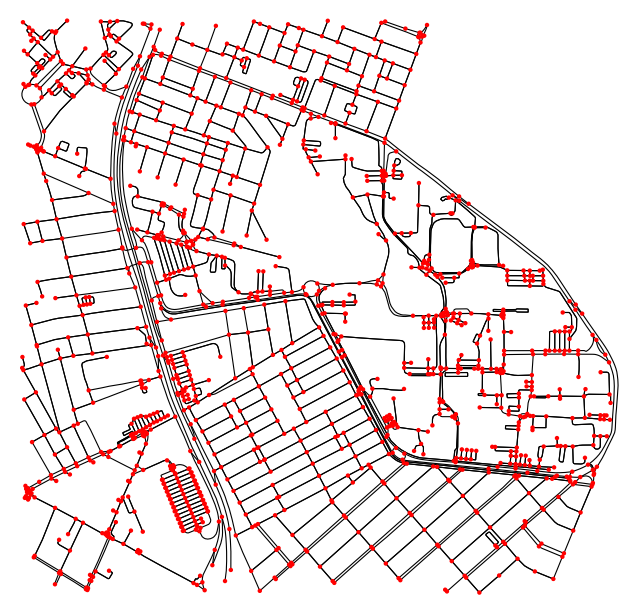

In [67]:
ufrn_box = -5.82846, -5.84804, -35.21549, -35.19446

ufrn = ox.graph_from_bbox(bbox=ufrn_box, network_type='bike')

fig, ax = ox.plot_graph(ufrn, bgcolor='white', node_color='red', edge_color='black', node_size=10, edge_linewidth=0.8)

### Using centrality metrics analysis to start answering the key question

To address the question, we analyze the **top central nodes** in the network using four centrality metrics: **Degree**, **Closeness**, **Betweenness**, and **Eigenvector**. By focusing on the top nodes for each metric, we can identify key nodes and intersections between these metrics.

The steps involve calculating each centrality measure and selecting the top 10 nodes for each. Intersections between metrics highlight nodes that exhibit high centrality in multiple measures, indicating their prominent role in network connectivity.


Top 10 Degree Centrality: {501286371, 501834691, 501834695, 501152617, 501791817, 501118379, 501834699, 501271794, 501006547, 501006398}
Top 10 Closeness Centrality: {503787968, 6956477636, 7199792330, 501033902, 1387156495, 8547312912, 500968851, 7244035029, 6956477589, 7244035031}
Top 10 Betweenness Centrality: {6956477636, 7199792330, 560206858, 505087021, 505087055, 505086655, 6956477589, 502539381, 505086618, 505087103}
Top 10 Eigenvector Centrality: {585798880, 501834691, 501834695, 501834699, 6370922829, 501834704, 8925520213, 8925520214, 501834715, 501834719}
Top 10 Degree & closeness Centrality: set()
Top 10 Degree & betweenness Centrality: set()
Top 10 Degree & eigenvector Centrality: {501834691, 501834699, 501834695}
Top 10 Closeness & betweenness Centrality: {7199792330, 6956477636, 6956477589}
Top 10 Closeness & eigenvector Centrality: set()
Top 10 Betweenness & eigenvector Centrality: set()
Top 10 All metrics Centrality: set()


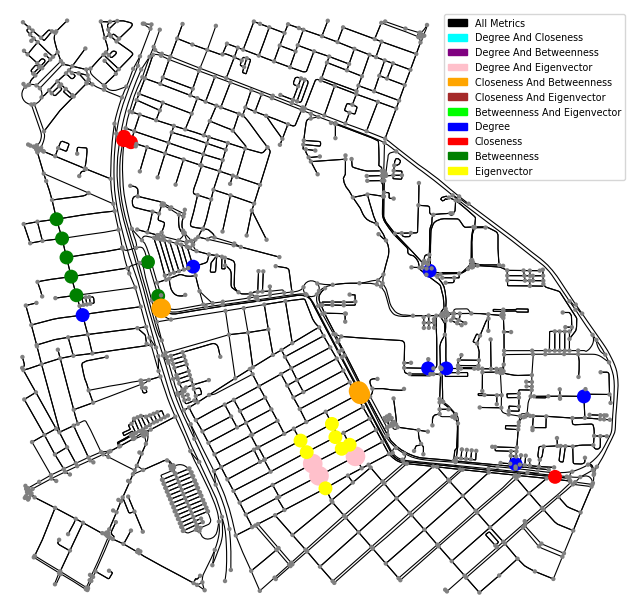

In [41]:
centrality_measures = {
    'degree': nx.degree_centrality(ufrn),
    'closeness': nx.closeness_centrality(ufrn),
    'betweenness': nx.betweenness_centrality(ufrn),
    'eigenvector': nx.eigenvector_centrality(ox.convert.to_digraph(ufrn), max_iter=1000)
}

top_10_nodes = {key: set(sorted(measure, key=measure.get, reverse=True)[:10]) for key, measure in centrality_measures.items()}

top_combinations = {
    'degree & closeness': top_10_nodes['degree'] & top_10_nodes['closeness'],
    'degree & betweenness': top_10_nodes['degree'] & top_10_nodes['betweenness'],
    'degree & eigenvector': top_10_nodes['degree'] & top_10_nodes['eigenvector'],
    'closeness & betweenness': top_10_nodes['closeness'] & top_10_nodes['betweenness'],
    'closeness & eigenvector': top_10_nodes['closeness'] & top_10_nodes['eigenvector'],
    'betweenness & eigenvector': top_10_nodes['betweenness'] & top_10_nodes['eigenvector'],
    'all metrics': top_10_nodes['degree'] & top_10_nodes['closeness'] & top_10_nodes['betweenness'] & top_10_nodes['eigenvector']
}

for name, nodes in {**top_10_nodes, **top_combinations}.items():
    print(f'Top 10 {name.capitalize()} Centrality: {nodes}')

color_map = {
    'all metrics': ('black', 250),
    'degree & closeness': ('cyan', 200),
    'degree & betweenness': ('purple', 200),
    'degree & eigenvector': ('pink', 200),
    'closeness & betweenness': ('orange', 200),
    'closeness & eigenvector': ('brown', 200),
    'betweenness & eigenvector': ('lime', 200),
    'degree': ('blue', 100),
    'closeness': ('red', 100),
    'betweenness': ('green', 100),
    'eigenvector': ('yellow', 100),
    'default': ('grey', 10)
}

node_colors, node_sizes = [], []

for node in ufrn.nodes:
    color, size = color_map['default']  # Valores padrão

    for label, nodes in top_combinations.items():
        if node in nodes:
            color, size = color_map[label]
            break
    else:
        for label, nodes in top_10_nodes.items():
            if node in nodes:
                color, size = color_map[label]
                break

    node_colors.append(color)
    node_sizes.append(size)

fig, ax = ox.plot_graph(
    ufrn,
    bgcolor='white',
    node_color=node_colors,
    edge_color='black',
    node_size=node_sizes,
    edge_linewidth=0.8,
    show=False,
    close=False
)

legend_handles = [mpatches.Patch(color=color, label=label.replace(' & ', ' and ').title()) for label, (color, _) in color_map.items() if label != 'default']

plt.legend(
    handles=legend_handles,
    loc='upper right',
    fontsize='x-small',
    frameon=True,
    markerscale=0.7
)
plt.show()


### Using PDF and CDF analysis of node degrees

To determine the best locations for bike stations, we can analyze **node degrees** using two statistical tools: **PDF (Probability Density Function)** and **CDF (Cumulative Distribution Function)**. This approach helps identify highly connected nodes (hubs) and prioritize station placement for optimal coverage and accessibility.

The steps involve the following:

1. **Identify High-Degree Nodes (Hubs):** The **PDF of node degrees** reveals the distribution of connectivity within the network. Nodes with higher degrees represent hubs with more connections, indicating areas with potentially higher traffic. These nodes are strong candidates for bike stations, as they can serve more students and visitors efficiently.

2. **Use the CDF to Select a Fraction of the Most Connected Nodes:** The **CDF allows for selecting specific percentiles** of nodes based on degree. For instance, choosing nodes above the 90th percentile (top 10%) ensures that bike stations are located in areas with significantly higher connectivity, maximizing their utility.



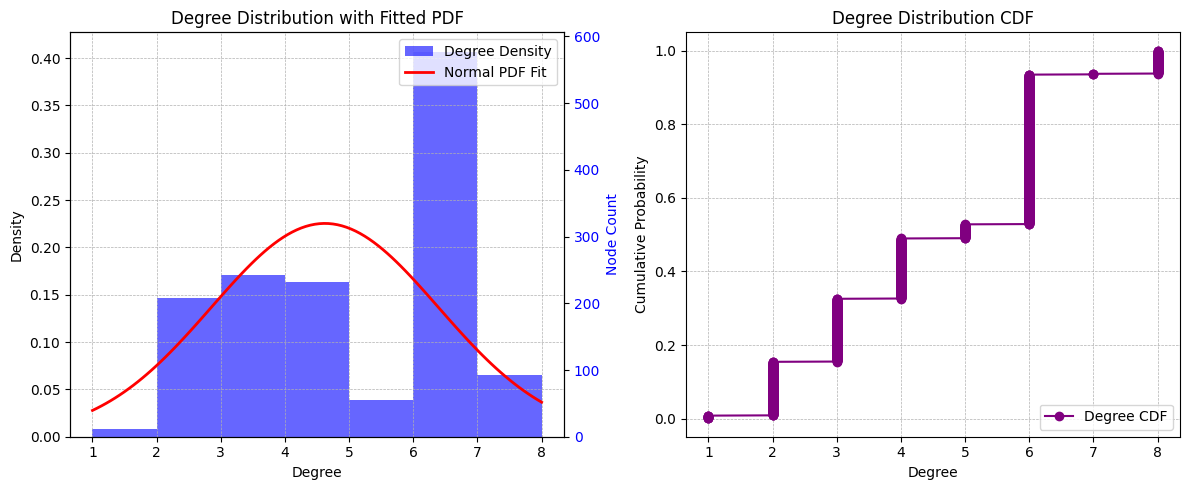

In [45]:
degrees = [deg for _, deg in ufrn.degree()]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))


counts, bins, patches = ax1.hist(degrees, bins=range(min(degrees), max(degrees) + 1),
                                 density=True, alpha=0.6, color='blue', label='Degree Density')

mean_deg = np.mean(degrees)
std_deg = np.std(degrees)
x = np.linspace(min(bins), max(bins), 100)
p = norm.pdf(x, mean_deg, std_deg)
ax1.plot(x, p, 'r', linewidth=2, label='Normal PDF Fit')

ax1_twin = ax1.twinx()
counts, bins, _ = ax1_twin.hist(degrees, bins=range(min(degrees), max(degrees) + 1),
                                alpha=0, color='blue')
ax1_twin.set_ylabel('Node Count', color='blue')
ax1_twin.tick_params(axis='y', labelcolor='blue')
ax1_twin.set_ylim(0, max(counts) * 1.1)

ax1.set_title('Degree Distribution with Fitted PDF')
ax1.set_xlabel('Degree')
ax1.set_ylabel('Density')
ax1.legend(loc='upper right')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)


sorted_degrees = np.sort(degrees)
cdf = np.arange(1, len(sorted_degrees) + 1) / len(sorted_degrees)

ax2.plot(sorted_degrees, cdf, marker='o', linestyle='-', color='purple', label='Degree CDF')
ax2.set_title('Degree Distribution CDF')
ax2.set_xlabel('Degree')
ax2.set_ylabel('Cumulative Probability')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()


The information obtained above from the PDF and CDF graphs helps us understand that the nodes highlighted in blue (degree centrality) in the image represent the top 10% most connected nodes in the university network map. These nodes serve as excellent candidates for potential locations for bike docking stations, as their high connectivity indicates areas with significant accessibility and movement, making them ideal for meeting user demand efficiently.


### Using multivariate analysis of centrality metrics

To determine the best locations for bike stations, we can analyze **centrality metrics** through a **multivariate approach**. This analysis highlights strategic points within the network, taking into account multiple aspects of connectivity and accessibility, thus helping to prioritize station placement for optimal coverage and ease of access.

The steps involve the following:

1. **Analyze the Distribution of Each Centrality Metric:** The **diagonal histograms in the pairplot** show the distribution of each metric (such as degree, closeness, betweenness, and eigenvector centralities). This helps identify areas with different characteristics, such as high connectivity or central accessibility, which can serve as potential locations for bike stations based on specific needs.

2. **Identify Relationships Between Pairs of Metrics:** The **contour plots in the pairplot** show correlations or patterns between centrality metrics. For example, nodes with high degree and eigenvector centralities are both central and well-connected, making them ideal candidates for bike stations that require strong accessibility and high traffic potential.



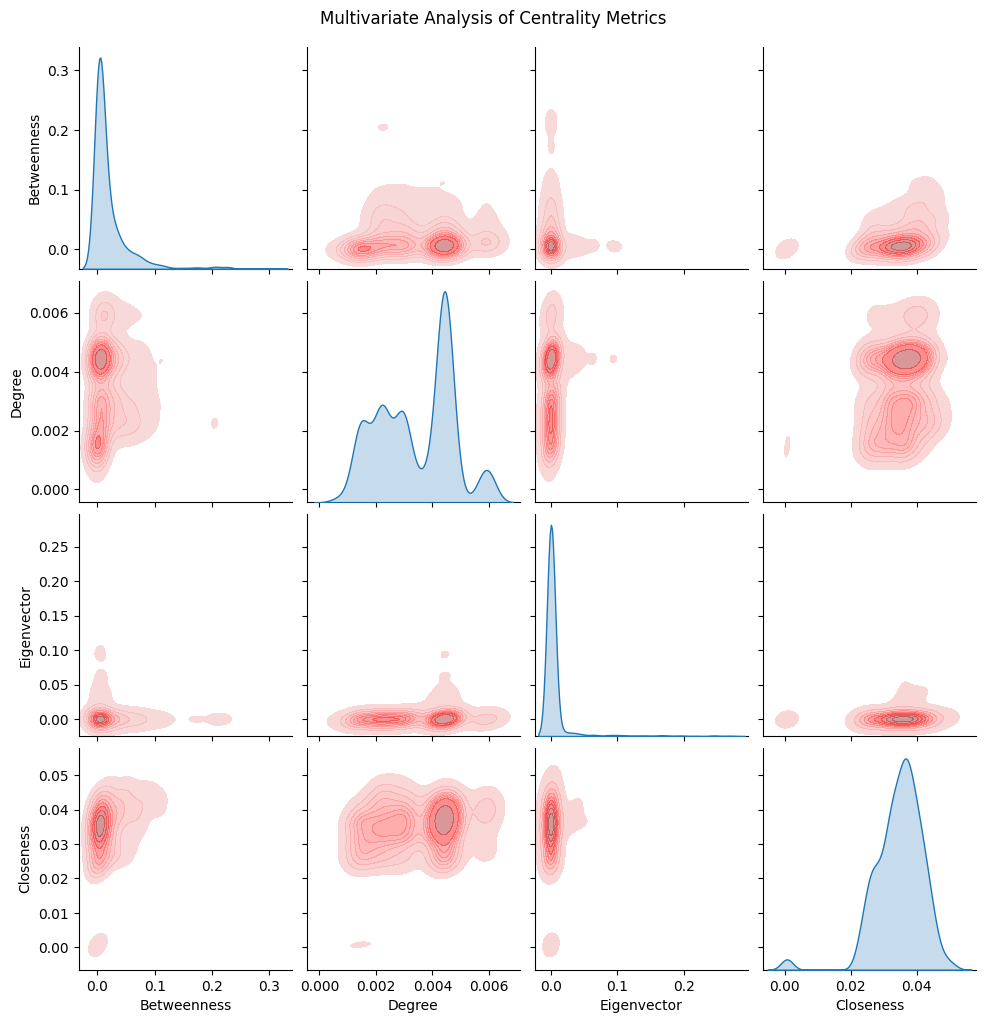

In [49]:
betweenness = nx.betweenness_centrality(ufrn)
degree = nx.degree_centrality(ufrn)
eigenvector = nx.eigenvector_centrality(ox.convert.to_digraph(ufrn), max_iter=1000)
closeness = nx.closeness_centrality(ufrn)

data = pd.DataFrame({
    "Betweenness": list(betweenness.values()),
    "Degree": list(degree.values()),
    "Eigenvector": list(eigenvector.values()),
    "Closeness": list(closeness.values())
})

sns.pairplot(data, kind="kde", diag_kind="kde", plot_kws={'fill': True, 'alpha': 0.5, 'color': 'red'})
plt.suptitle("Multivariate Analysis of Centrality Metrics", y=1.02)
plt.show()


Using these relationships, stations can be placed at locations that balance multiple criteria, such as high intermediation (betweenness), central accessibility (closeness), and strong connectivity (degree and eigenvector). This ensures that stations are both accessible and well-positioned to serve as key transfer points within the network.


### Finding k-core/k-shell

In [88]:
simple_graph = nx.Graph(ufrn)
simple_graph.remove_edges_from(nx.selfloop_edges(ufrn))

set([v for k,v in nx.core_number(simple_graph).items()])


{1, 2}

> Here we see that the innermost k-core has k equal 2

[500968821, 500968823, 500968839, 500968847, 500968850, 500968851, 500968862, 500968864, 500968868, 500968876, 500968880, 500973563, 500973601, 500973633, 500973648, 500973663, 500973670, 500973689, 500973759, 500975726, 500986119, 500986122, 500986130, 500986137, 500986164, 500986176, 500986191, 500986194, 500986207, 500986215, 500986639, 500986659, 501006370, 501006390, 501006398, 501006420, 501006437, 501006479, 501006493, 501006498, 501006522, 501006535, 501006547, 501006655, 501006663, 501006700, 501006743, 501006770, 501006787, 501006818, 501006825, 501006855, 501013499, 501013505, 501013570, 501013611, 501033576, 501033598, 501033607, 501033725, 501033762, 501033799, 501033902, 501034004, 501034021, 501034060, 501034081, 501034099, 501087052, 501087069, 501087078, 501087080, 501087085, 501087123, 501087138, 501087284, 501087374, 501087462, 501118366, 501118379, 501118394, 501118420, 501118484, 501118503, 501118536, 501118547, 501152566, 501152572, 501152580, 501152617, 501271620

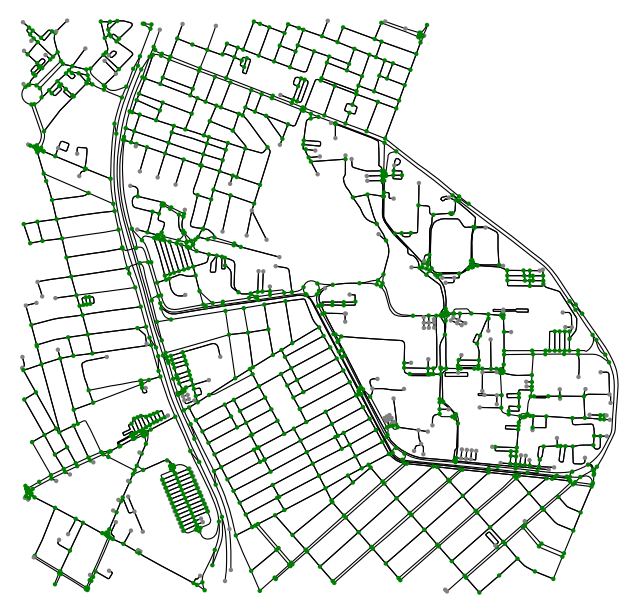

In [90]:
core = list(nx.k_core(simple_graph, 2))
print(core)
print(len(core))

node_colors = ['green' if node in core else 'grey' for node in ufrn.nodes()]

fig, ax = ox.plot_graph(ufrn, bgcolor='white', node_color=node_colors, edge_color='black', node_size=10, edge_linewidth=0.8)

> k-core is highlighted in green and counts with 1124 nodes